# Homework 4: Deep Learning

## Problem 1: Softmax Properties

#### 1. Show that the softmax function is invariant to constant offsets to its input.

In [ ]:
import numpy as np

def softmax(a):
    """Compute the softmax of vector a"""
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    return exp_a / sum_exp_a

# Example usage
a = np.array([1, 2, 3])
print("Original softmax output:", softmax(a))

# Adding a constant offset
c = 5
print("Softmax output with offset:", softmax(a + c))

Original softmax output: [0.09003057 0.24472847 0.66524096]
Softmax output with offset: [0.09003057 0.24472847 0.66524096]


From the outputs above, we can see that softmax(a) and softmax(a+c) are the same, thus demonstrating the invariance property of softmax.

#### 2. Why is the observation that the softmax function is invariant to constant offsets to its input important when implementing it in a neural network?

It is important because it allows us to shift the pre-softmax values by any constant value without changing the final output probabilities. This can be useful for numerical stability when dealing with very large or very small logit values, as adding or subtracting a constant can prevent overflow or underflow issues during computation.

## Problem 2: Training a CNN using CIFAR-10 Data

#### 1. Load the dataset and check how the images look like

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import matplotlib.pyplot as plt
import numpy as np

170498071/170498071 [==============================] - 6s 0us/step


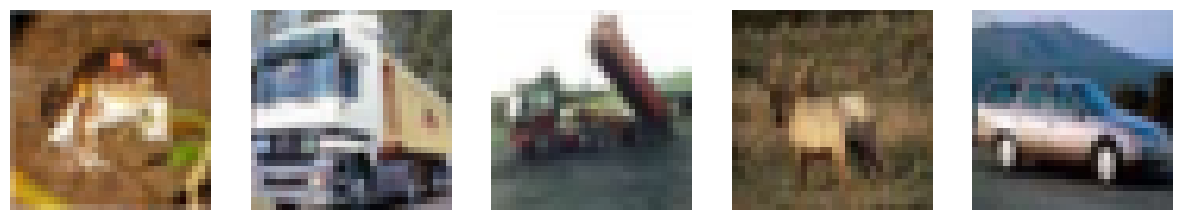

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# Load the CIFAR-10 dataset
cifar10 = tf.keras.datasets.cifar10

# Load the first 5 examples from the training set
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train_sample = x_train[:5]
y_train_sample = y_train[:5]

# Display the first 5 example images
fig, axes = plt.subplots(1, 5, figsize=(15, 3))
for i, ax in enumerate(axes):
    ax.imshow(x_train_sample[i])
    ax.axis('off')
plt.show()

#### 2. Train a CNN with three hidden convolutional layers that use the ReLU activation function.

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Flatten, Dense

# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Preprocess the data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert labels to one-hot encoding
num_classes = 10
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

# Define the CNN model
model = Sequential([
    Conv2D(64, (11, 11), padding='same', activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), padding='same', activation='relu'),
    Conv2D(128, (3, 3), padding='same', activation='relu'),
    AveragePooling2D((8, 8)),
    Flatten(),
    Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


# Train the model and store the history
history = model.fit(x_train, y_train, batch_size=128, epochs=15, validation_data=(x_test, y_test))

Epoch 1/15
391/391 [==============================] - 9s 20ms/step - loss: 1.8399 - accuracy: 0.3245 - val_loss: 1.6128 - val_accuracy: 0.4196
Epoch 2/15
391/391 [==============================] - 6s 16ms/step - loss: 1.5417 - accuracy: 0.4421 - val_loss: 1.4566 - val_accuracy: 0.4724
Epoch 3/15
391/391 [==============================] - 7s 17ms/step - loss: 1.4170 - accuracy: 0.4940 - val_loss: 1.3476 - val_accuracy: 0.5219
Epoch 4/15
391/391 [==============================] - 6s 16ms/step - loss: 1.3129 - accuracy: 0.5330 - val_loss: 1.2462 - val_accuracy: 0.5550
Epoch 5/15
391/391 [==============================] - 7s 17ms/step - loss: 1.2417 - accuracy: 0.5596 - val_loss: 1.2161 - val_accuracy: 0.5669
Epoch 6/15
391/391 [==============================] - 6s 17ms/step - loss: 1.1683 - accuracy: 0.5875 - val_loss: 1.1823 - val_accuracy: 0.5728
Epoch 7/15
391/391 [==============================] - 7s 17ms/step - loss: 1.1045 - accuracy: 0.6107 - val_loss: 1.1265 - val_accuracy: 0.6023

**Display the training loss as a function of epochs.**

313/313 [==============================] - 2s 5ms/step - loss: 0.9376 - accuracy: 0.6717
Test accuracy: 0.6717
Test loss: 0.9376


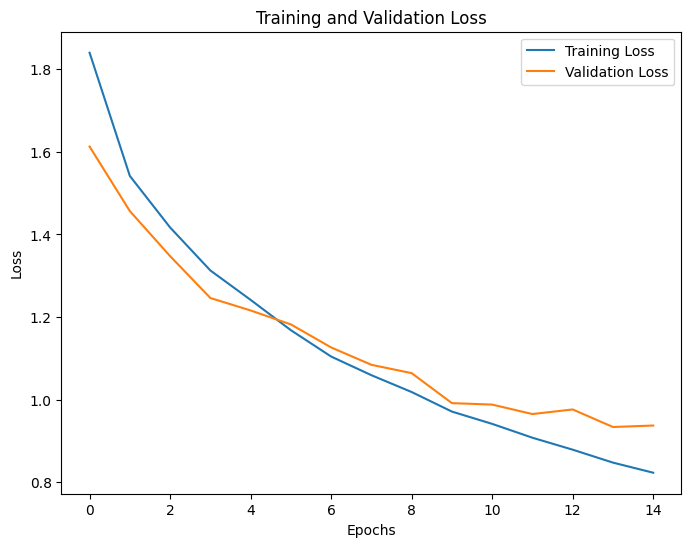

In [ ]:
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc:.4f}')
print(f'Test loss: {test_loss:.4f}')

# Plot the training and validation loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

**What is the accuracy on the test data?**

The test accuracy is 0.6717

**How did you initialize the weights?**

The weights in the convolutional and dense layers are initialized with the default weight initializer in TensorFlow, which is the glorot_uniform initializer. This initializer draws samples from a uniform distribution within the range (-limit, limit). This helps ensure that the weights are neither too small nor too large, allowing for better convergence during training.


**Discuss your architecture and hyper-parameters.**

We followed the architecture from the question, with three hidden convolutional layers that uses ReLU, along with max pooling, average pooling, and a layer with softmax activation.

The first convolutional layer uses 64 filters of size 11x11 with ReLU activation. This large filter size help capture more complex patterns in the input images.

The next two convolutional layers use 128 filters of size 3x3 with ReLU activation. These smaller filters help capture more details and smaller patterns.

Max pooling is used after the first convolutional layer to downsample the feature maps and introduce spatial invariance. Average pooling is used before the fully connected layer to reduce the spatial dimensions and summarize the feature maps.

Hyper-parameters:
* Batch size: 128 (a common choice for efficient training)
* Epochs: 15 (for a reasonable iteration of training but does not take too much time)
* Optimizer: Adam
* Loss function: Categorical cross-entropy

#### 3. Visualize all of the 11×11×3 filters learned by the first convolutional layer as an RGB image array

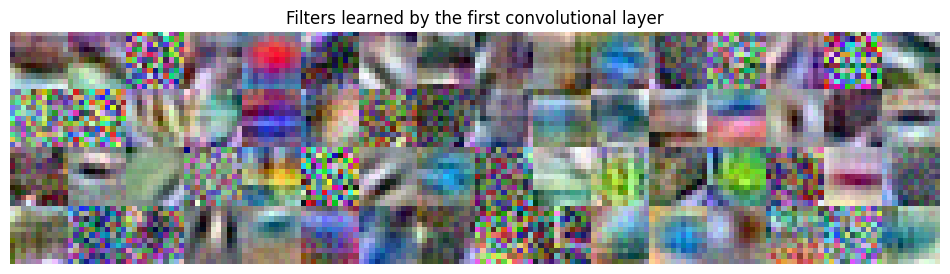

In [ ]:
# Get the weights of the first convolutional layer
conv_layer = model.layers[0]
filters = conv_layer.get_weights()[0]

# Normalize the filters using contrast stretching
for i in range(filters.shape[3]):
    filt = filters[:, :, :, i]
    filt_min, filt_max = filt.min(), filt.max()
    filters[:, :, :, i] = (filt - filt_min) / (filt_max - filt_min)

# Tile the filters into a single RGB image
n_filters = filters.shape[3]
filter_h, filter_w = filters.shape[0], filters.shape[1]
rows, cols = 4, 16
img_h, img_w = rows * filter_h, cols * filter_w
img = np.zeros((img_h, img_w, 3))

for i in range(n_filters):
    row = (i // cols) * filter_h
    col = (i % cols) * filter_w
    img[row:row+filter_h, col:col+filter_w, :] = filters[:, :, :, i]

# Display the image
plt.figure(figsize=(12, 6))
plt.imshow(img)
plt.axis('off')
plt.title('Filters learned by the first convolutional layer')
plt.show()

#### 4. Using the same architecture, add in batch normalization between each of the hidden layers. Compare the training loss with and without batch normalization as a function of epochs. What is the final test error? Visualize the filters.

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Flatten, Dense, BatchNormalization
import matplotlib.pyplot as plt

# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Preprocess the data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert labels to one-hot encoding
num_classes = 10
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

# Define the CNN model with batch normalization
model_bn = Sequential([
    Conv2D(64, (11, 11), padding='same', activation='relu', input_shape=(32, 32, 3)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    Conv2D(128, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    AveragePooling2D((8, 8)),
    Flatten(),
    Dense(num_classes, activation='softmax')
])

# Compile the model
model_bn.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

# Train the model with batch normalization
history_bn = model_bn.fit(x_train, y_train, batch_size=128, epochs=15, validation_data=(x_test, y_test))

Epoch 1/15
391/391 [==============================] - 11s 22ms/step - loss: 1.4112 - accuracy: 0.4927 - val_loss: 2.1877 - val_accuracy: 0.3130
Epoch 2/15
391/391 [==============================] - 8s 20ms/step - loss: 1.0617 - accuracy: 0.6261 - val_loss: 1.3836 - val_accuracy: 0.5215
Epoch 3/15
391/391 [==============================] - 8s 20ms/step - loss: 0.8990 - accuracy: 0.6853 - val_loss: 1.1639 - val_accuracy: 0.5849
Epoch 4/15
391/391 [==============================] - 8s 20ms/step - loss: 0.7927 - accuracy: 0.7232 - val_loss: 0.9364 - val_accuracy: 0.6768
Epoch 5/15
391/391 [==============================] - 8s 20ms/step - loss: 0.7150 - accuracy: 0.7502 - val_loss: 1.0225 - val_accuracy: 0.6511
Epoch 6/15
391/391 [==============================] - 8s 20ms/step - loss: 0.6498 - accuracy: 0.7759 - val_loss: 0.9306 - val_accuracy: 0.6808
Epoch 7/15
391/391 [==============================] - 8s 20ms/step - loss: 0.5972 - accuracy: 0.7952 - val_loss: 0.9414 - val_accuracy: 0.668

313/313 [==============================] - 1s 4ms/step - loss: 0.8931 - accuracy: 0.7356

Test accuracy with batch normalization: 0.7356
Test loss with batch normalization: 0.8931
Test Error: 0.3879



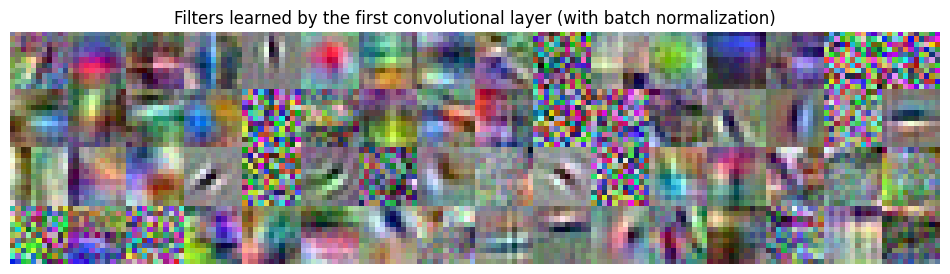

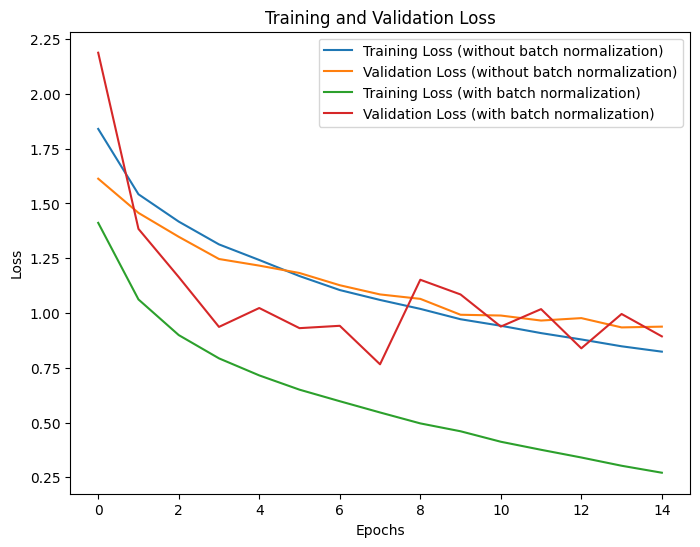

In [ ]:
# Evaluate the model on the test data
test_loss_bn, test_acc_bn = model_bn.evaluate(x_test, y_test)
print()
print(f'Test accuracy with batch normalization: {test_acc_bn:.4f}')
print(f'Test loss with batch normalization: {test_loss_bn:.4f}')

# find test error
import numpy as np
num_classes = 10
test_error = test_loss_bn / np.log(num_classes)

print(f"Test Error: {test_error:.4f}")
print()

# Visualize the filters learned by the first convolutional layer
conv_layer = model_bn.layers[0]
filters = conv_layer.get_weights()[0]

# Normalize the filters using contrast stretching
for i in range(filters.shape[3]):
    filt = filters[:, :, :, i]
    filt_min, filt_max = filt.min(), filt.max()
    filters[:, :, :, i] = (filt - filt_min) / (filt_max - filt_min)

# Tile the filters into a single RGB image
n_filters = filters.shape[3]
filter_h, filter_w = filters.shape[0], filters.shape[1]
rows, cols = 4, 16
img_h, img_w = rows * filter_h, cols * filter_w
img = np.zeros((img_h, img_w, 3))

for i in range(n_filters):
    row = (i // cols) * filter_h
    col = (i % cols) * filter_w
    img[row:row+filter_h, col:col+filter_w, :] = filters[:, :, :, i]

# Display the image
plt.figure(figsize=(12, 6))
plt.imshow(img)
plt.axis('off')
plt.title('Filters learned by the first convolutional layer (with batch normalization)')
plt.show()

# Compare training loss with and without batch normalization
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss (without batch normalization)')
plt.plot(history.history['val_loss'], label='Validation Loss (without batch normalization)')
plt.plot(history_bn.history['loss'], label='Training Loss (with batch normalization)')
plt.plot(history_bn.history['val_loss'], label='Validation Loss (with batch normalization)')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

The test accuracy with batch normalization is 0.7356

The final test error is 0.3879

The model with batch normalization has higher accuracy and lower error is because batch normalization helps to stabilize and accelerate the training process by normalizing the activations of each layer, which can prevent internal covariate shift and lead to higher learning rates.

##Problem 3

####Part 1

4422102/4422102 [==============================] - 1s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5818: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


Time for epoch 1 is 10.883354425430298 sec


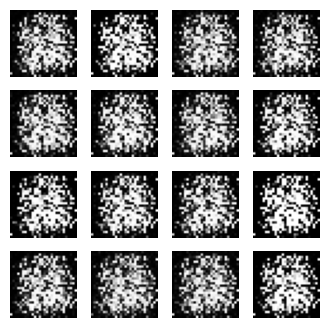

Time for epoch 2 is 1.122495174407959 sec


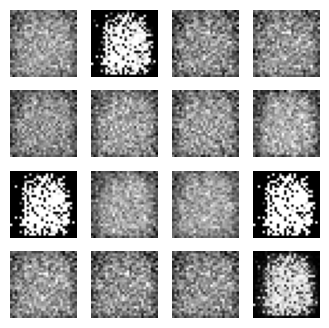

Time for epoch 3 is 1.110957384109497 sec


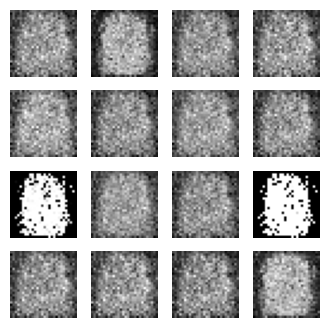

Time for epoch 4 is 1.4650728702545166 sec


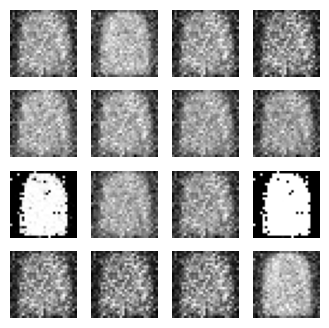

Time for epoch 5 is 1.1302237510681152 sec


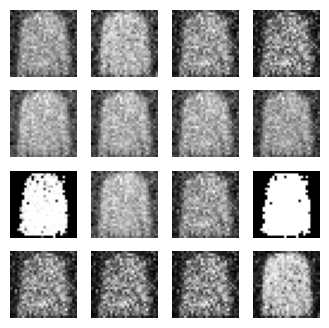

Time for epoch 6 is 1.1206297874450684 sec


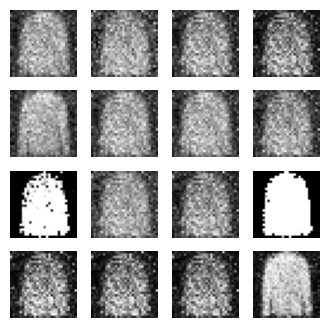

Time for epoch 7 is 1.1279687881469727 sec


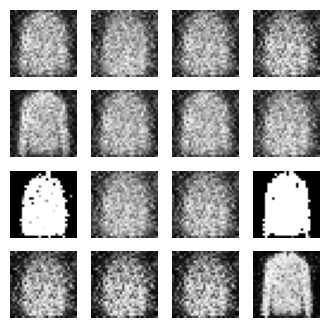

Time for epoch 8 is 1.1118543148040771 sec


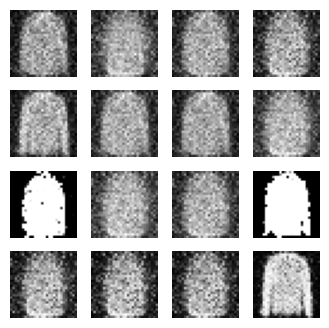

Time for epoch 9 is 1.099337100982666 sec


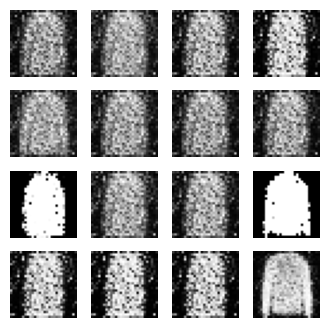

Time for epoch 10 is 1.1105098724365234 sec


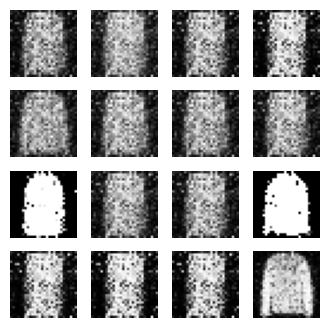

Time for epoch 11 is 1.4918441772460938 sec


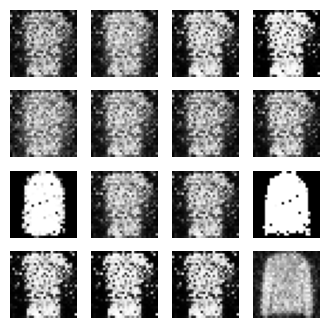

Time for epoch 12 is 1.1354725360870361 sec


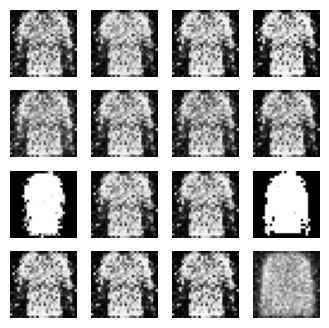

Time for epoch 13 is 1.1258962154388428 sec


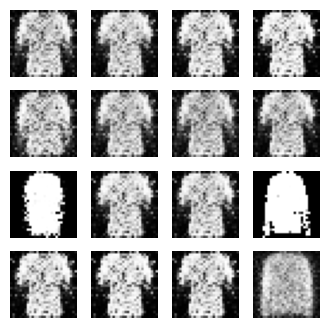

Time for epoch 14 is 1.1264996528625488 sec


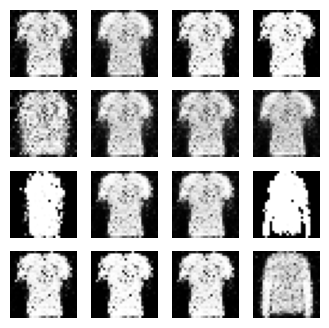

Time for epoch 15 is 1.1225886344909668 sec


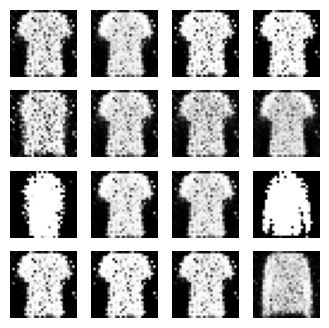

Time for epoch 16 is 1.108625888824463 sec


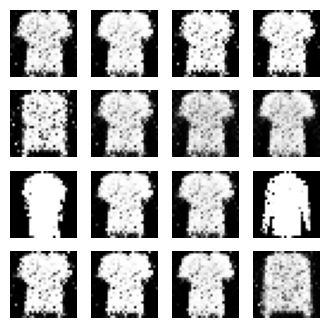

Time for epoch 17 is 1.1102707386016846 sec


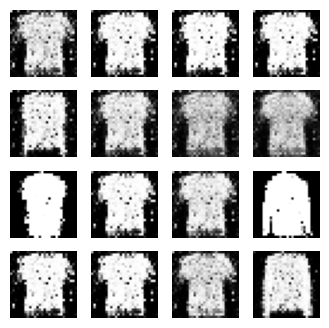

Time for epoch 18 is 1.4691369533538818 sec


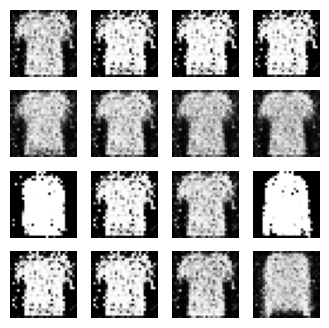

Time for epoch 19 is 1.1269371509552002 sec


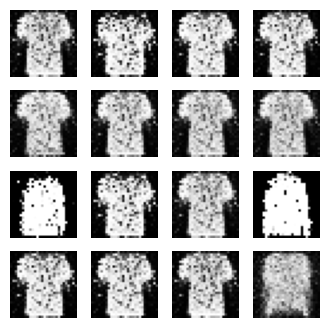

Time for epoch 20 is 1.133756399154663 sec


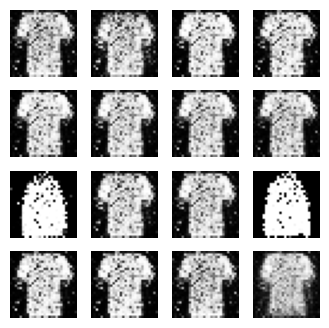

Time for epoch 21 is 1.1525623798370361 sec


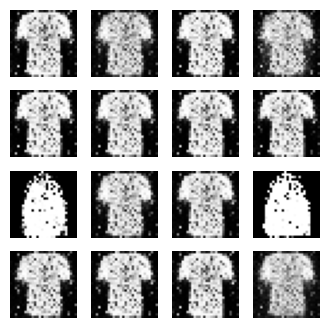

Time for epoch 22 is 1.1210112571716309 sec


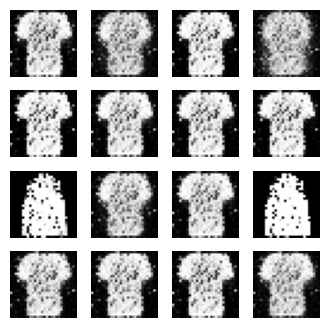

Time for epoch 23 is 1.1029086112976074 sec


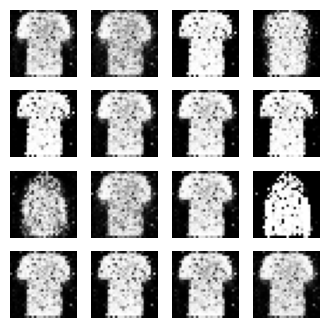

Time for epoch 24 is 1.1541392803192139 sec


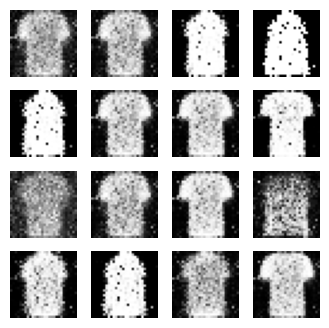

Time for epoch 25 is 1.4417338371276855 sec


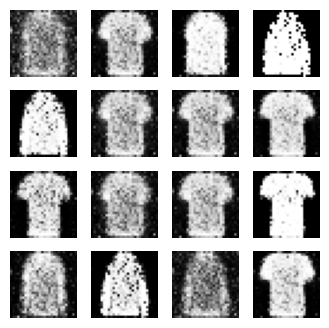

Time for epoch 26 is 1.2455189228057861 sec


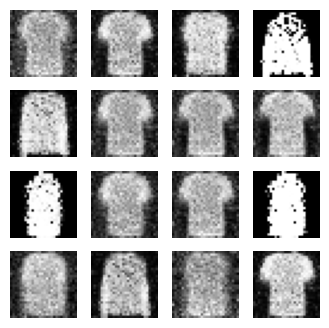

Time for epoch 27 is 1.1174812316894531 sec


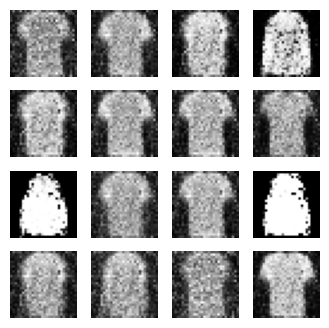

Time for epoch 28 is 1.1707065105438232 sec


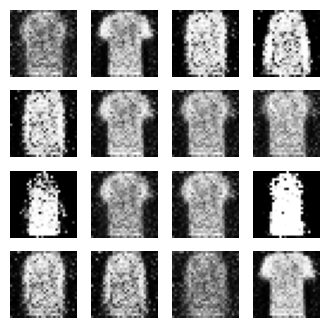

Time for epoch 29 is 1.1354587078094482 sec


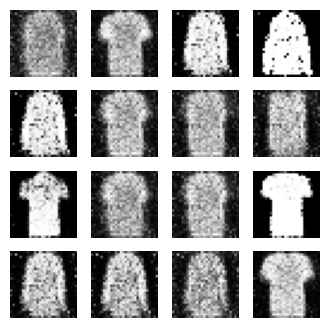

Time for epoch 30 is 1.1241190433502197 sec


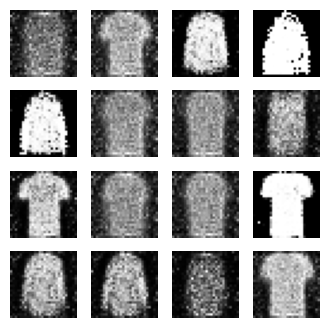

Time for epoch 31 is 1.147014856338501 sec


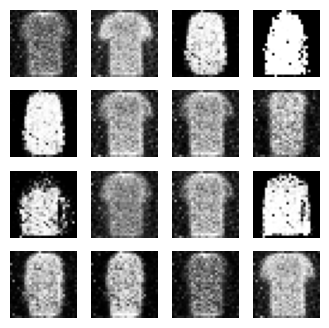

Time for epoch 32 is 1.4784529209136963 sec


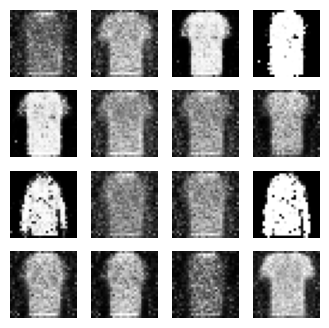

Time for epoch 33 is 1.1955623626708984 sec


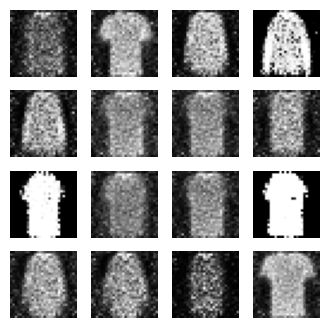

Time for epoch 34 is 1.1451025009155273 sec


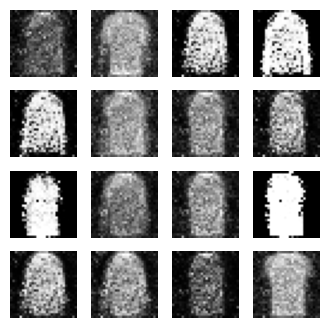

Time for epoch 35 is 1.5317351818084717 sec


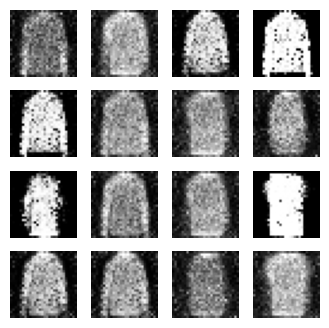

Time for epoch 36 is 1.1334583759307861 sec


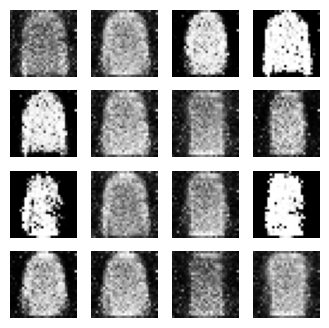

Time for epoch 37 is 1.1223759651184082 sec


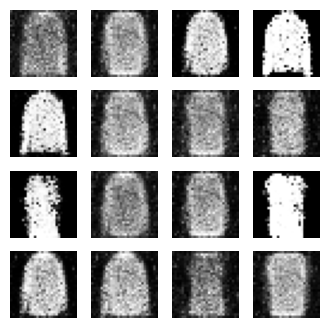

Time for epoch 38 is 1.2829391956329346 sec


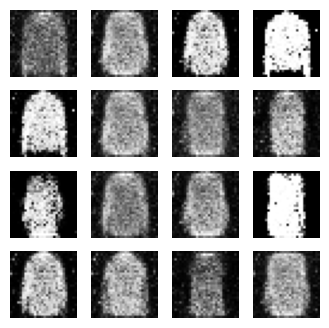

Time for epoch 39 is 1.5143837928771973 sec


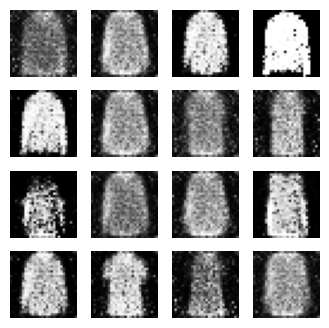

Time for epoch 40 is 1.1407830715179443 sec


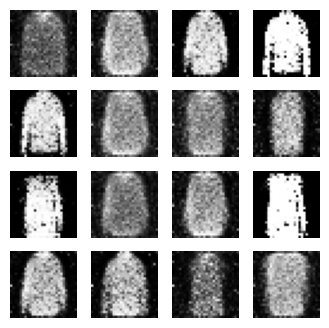

Time for epoch 41 is 1.129540205001831 sec


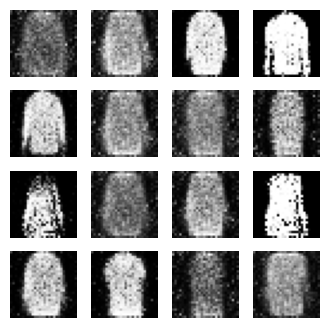

Time for epoch 42 is 1.1432113647460938 sec


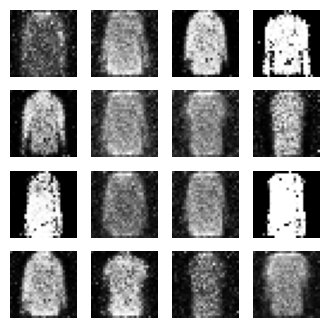

Time for epoch 43 is 1.123964786529541 sec


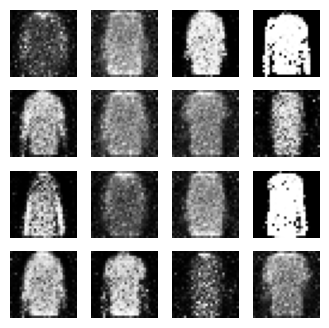

Time for epoch 44 is 1.1544783115386963 sec


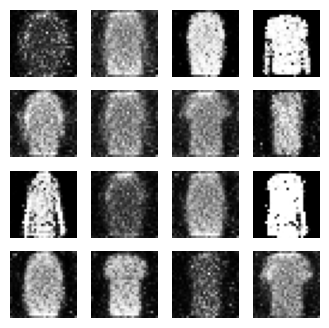

Time for epoch 45 is 1.24629807472229 sec


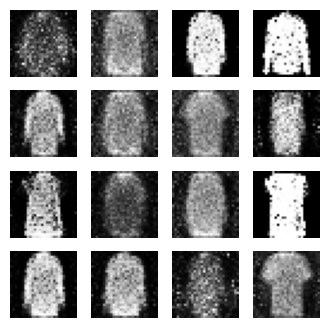

Time for epoch 46 is 1.5130105018615723 sec


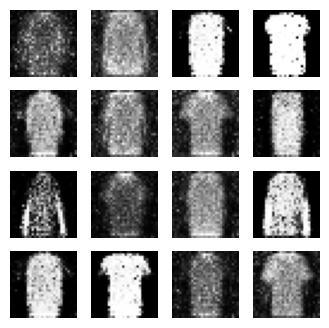

Time for epoch 47 is 1.1475684642791748 sec


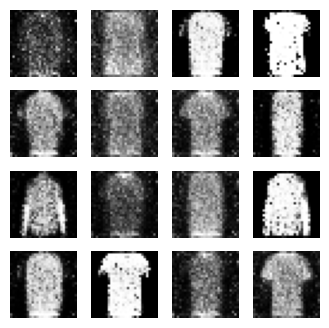

Time for epoch 48 is 1.1627280712127686 sec


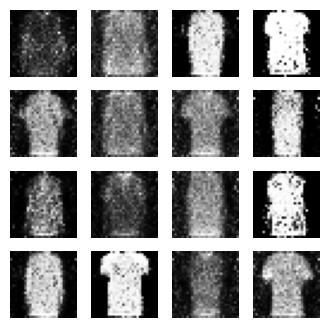

Time for epoch 49 is 1.2296295166015625 sec


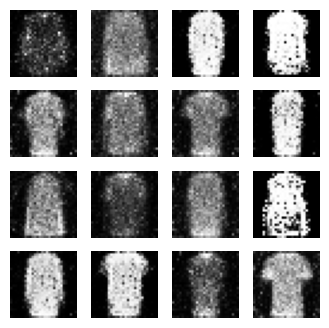

Time for epoch 50 is 1.5101408958435059 sec


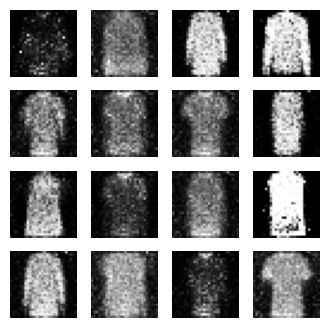

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

# Load Fashion-MNIST dataset
(train_images, _), (_, _) = tf.keras.datasets.fashion_mnist.load_data()
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1).astype('float32')
train_images = (train_images - 127.5) / 127.5  # Normalize to [-1, 1]

BUFFER_SIZE = 60000
BATCH_SIZE = 256

# Create batches of training data
train_dataset = tf.data.Dataset.from_tensor_slices(train_images).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

# Generator model
def make_generator_model():
    model = tf.keras.Sequential()
    model.add(layers.Dense(256, use_bias=False, input_shape=(100,)))
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())

    model.add(layers.Dense(512, use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())

    model.add(layers.Dense(1024, use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())

    model.add(layers.Dense(28 * 28 * 1, use_bias=False, activation='tanh'))
    model.add(layers.Reshape((28, 28, 1)))

    return model

# Discriminator model
def make_discriminator_model():
    model = tf.keras.Sequential()
    model.add(layers.Flatten(input_shape=(28, 28, 1)))
    model.add(layers.Dense(1024))
    model.add(layers.ReLU())

    model.add(layers.Dense(512))
    model.add(layers.ReLU())

    model.add(layers.Dense(256))
    model.add(layers.ReLU())

    model.add(layers.Dense(1, activation='sigmoid'))

    return model

# Loss function and optimizers
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

generator = make_generator_model()
discriminator = make_discriminator_model()

generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

# Training step
@tf.function
def train_step(images):
    noise = tf.random.normal([BATCH_SIZE, 100])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generated_images = generator(noise, training=True)

        real_output = discriminator(images, training=True)
        fake_output = discriminator(generated_images, training=True)

        gen_loss = generator_loss(fake_output)
        disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

# Training loop
import time
import matplotlib.pyplot as plt

EPOCHS = 50
noise_dim = 100
num_examples_to_generate = 16

# Seed for visualization
seed = tf.random.normal([num_examples_to_generate, noise_dim])

# Training function
def train(dataset, epochs):
    for epoch in range(epochs):
        start = time.time()

        for image_batch in dataset:
            train_step(image_batch)

        print(f'Time for epoch {epoch + 1} is {time.time() - start} sec')

        # Produce images for the GIF
        generate_and_save_images(generator, epoch + 1, seed)

# Function to generate and save images
def generate_and_save_images(model, epoch, test_input):
    predictions = model(test_input, training=False)
    fig = plt.figure(figsize=(4, 4))

    for i in range(predictions.shape[0]):
        plt.subplot(4, 4, i + 1)
        plt.imshow(predictions[i, :, :, 0] * 127.5 + 127.5, cmap='gray')
        plt.axis('off')

    plt.savefig(f'image_at_epoch_{epoch:04d}.png')
    plt.show()

# Train the model
train(train_dataset, EPOCHS)


#### Part 2

In [ ]:
# Generate samples
num_samples = 3000
noise = tf.random.normal([num_samples, 100])
generated_images = generator(noise, training=False)

# Use the previously defined classifier to predict the class labels of the generated samples and plot the histogram
# Assuming classifier is defined and trained as per the previous instructions
predicted_labels = classifier.predict(generated_images)
predicted_labels = tf.argmax(predicted_labels, axis=1)

# Plot histogram
plt.hist(predicted_labels.numpy(), bins=range(11), alpha=0.75, edgecolor='black')
plt.xlabel('Class Label')
plt.ylabel('Frequency')
plt.title('Histogram of Predicted Labels for Generated Samples')
plt.xticks(range(10))
plt.show()



NameError: name 'classifier' is not defined

##Problem 4

####1. Write a brief description of your use case, including the problem it solves and how ChatGPT-4 can be used to solve it.
####2. What is its potential impact?
####3. Reflect on how deep learning and language models like ChatGPT can be used to solve real-world problems, and how you might incorporate these technologies into your future work.


1. Mental health issues are rising globally, and many people often lack access to immediate support. Traditional mental health support systems often have limited resources, and long waiting time. Many people experience mental health crises outside regular hours when professional help may not be available.

  ChatGPT-4 can offer immediate, personalized mental health support and counseling. Imagine it in a simple, easy-to-use app where people can get real-time help tailored to their needs. It can chat with users, listen empathetically, suggest coping strategies, and provide useful resources. While it can't replace a professional therapist, it can be a valuable support during tough times and guide users to professional help when needed.








2.  What is its potential impact?

  Potential Impact:

  More Accessibility: This app can give people 24/7 mental health support, especially those living in remote areas or who can't easily access professional services.

  Immediate Assistance: It offers quick help during mental health crises, which might prevent harm and provide comfort until someone can reach professional help.

  Less Stigma: It provides a private way to seek help, which can reduce the stigma around mental health issues.
  
  Supporting Professionals: By providing initial support, it can lighten the load for mental health professionals, letting them concentrate on more severe cases.












3. Deep learning and language models like ChatGPT have massive potential across various fields. They're great at understanding and generating human-like text, which makes them perfect for applications that need natural language processing. The model can be used in healthcare, education, customer service, content creation, and even legal assistance.

In our future work, we aim to integrate deep learning and language models into applications that need advanced language understanding. We thought to integrate deep learning and lanuguage models into smart chatbots for healthcare, education, and customer service to provide quick, accurate responses. We also expect it to be human's personal assistants to manage schedules, provide reminders, and offer personalized recommendations.
